# Textmining

---

Group name: O

---


In [13]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

Data Import 

In [14]:
import pandas as pd

# Import data from task 1
df = pd.read_csv("https://raw.githubusercontent.com/FabioRaab/bigData-HW1/main/notebooks/articles.csv")

# drop some columns
df.drop(columns=["Subtitle h3"], inplace=True)

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 ElectionA Blue Nevada Means Democrats Wil...


## Data corrections

In [17]:
df['Article-Text'] = df['Article-Text'].astype(str).str.lower()

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...


We did not scrape the posting time of the article which is why I will not be using function pd.to_datetime.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1 non-null      int64 
 1   Author        1 non-null      object
 2   Title         1 non-null      object
 3   Subtitle h2   1 non-null      object
 4   Article-Text  1 non-null      object
dtypes: int64(1), object(4)
memory usage: 168.0+ bytes


## Text mining data preparation

In [19]:
from nltk.tokenize import RegexpTokenizer

In [20]:
regexp= RegexpTokenizer('\w+')
df['text_token']=df['Article-Text'].apply(regexp.tokenize)

In [21]:
df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra..."


## Stopwords

In [23]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
import nltk
from nltk.corpus import stopwords

In [26]:
stopwords = nltk.corpus.stopwords.words("english")

stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
my_stopwords = ['that']
stopwords.extend(my_stopwords)

In [29]:
df['text_token_s'] = df['text_token'].apply(lambda x: [i for i in x if i not in stopwords])

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token,text_token_s
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra...","[2022, electiona, blue, nevada, means, democra..."


## Transform data and remove infrequent words

In [30]:
df['text_si'] = df['text_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

df

,Unnamed: 0,Author,Title,Subtitle h2,Article-Text,text_token,text_token_s,text_si
0,0,Geoffrey Skelley,A Blue Nevada Means Democrats Will Keep Contro...,Democrats held most key seats and gained Penns...,2022 electiona blue nevada means democrats wil...,"[2022, electiona, blue, nevada, means, democra...","[2022, electiona, blue, nevada, means, democra...",2022 electiona blue nevada means democrats kee...


## Lemmatization

In [32]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [33]:
wordnet_lem = WordNetLemmatizer()

In [34]:
df['text_sil'] = df['text_si'].apply(wordnet_lem.lemmatize)

In [37]:
check_difference = (df['text_sil'] == df['text_si'])

check_difference.value_counts()

True    1
dtype: int64

In [38]:
df.to_csv("article.csv", index=None)

## Data Visualization

In [40]:
all_words = ' '.join([i for i in df['text_sil']])

all_words

'2022 electiona blue nevada means democrats keep control senateby geoffrey skelley nov 2022 photo illustration fivethirtyeight getty imagesfor democrats silver state gold abc news reported democratic sen catherine cortez masto projected win reelection nevada projection confirms democrats retain least seats senate vice president kamala harris tie breaking vote guarantees democrats slim majority congress upper chamber nevada news comes heels projection arizona senate race friday night became clear democratic sen mark kelly would win reelection grand canyon state know partisan makeup next senate lone exception georgia runoff dec alaska yet projected one two gop contenders win results unusual midterm election coming 2022 election president party lost senate seats last midterm elections average loss roughly five seats democrats suffer net losses senate picking open seat pennsylvania previously held republican could achieve net gain one seat democratic sen raphael warnock defeats republican 

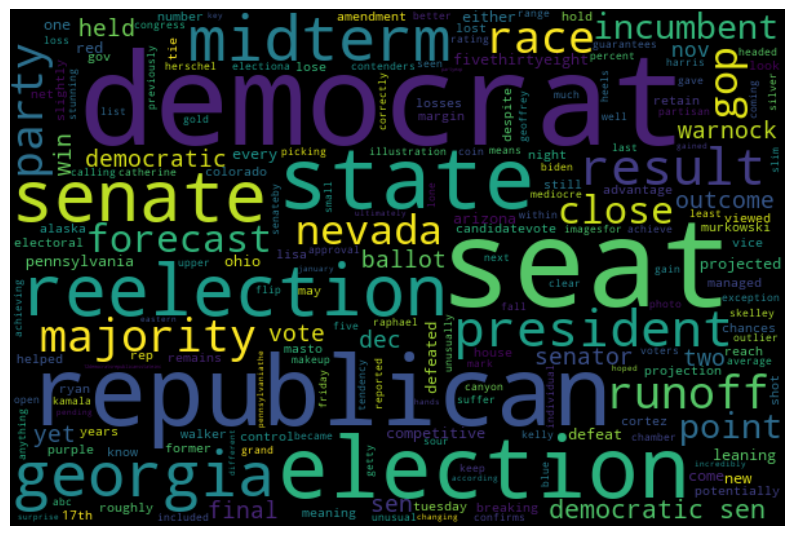

In [41]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

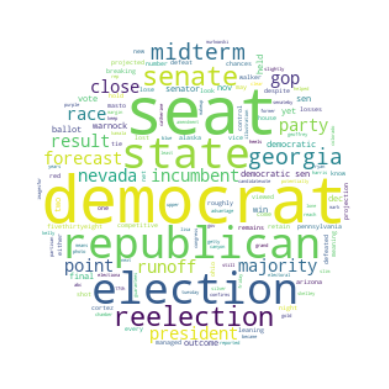

In [42]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

## Frequency distributions

In [43]:
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eciiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
words_tokens = nltk.word_tokenize(all_words)

fd = FreqDist(words_tokens)

fd

FreqDist({'democrats': 22, 'seats': 15, 'democratic': 9, 'sen': 8, 'reelection': 8, 'senate': 8, 'georgia': 8, 'republican': 8, 'state': 7, 'president': 7, ...})

## Most common words

In [47]:
top_5 = fd.most_common(n=5)

top_5

[('democrats', 22),
 ('seats', 15),
 ('democratic', 9),
 ('sen', 8),
 ('reelection', 8)]

In [48]:
fd.tabulate(5)

 democrats      seats democratic        sen reelection 
        22         15          9          8          8 


## Plot common words

In [49]:
top_10 = fd.most_common(10)

top_10

[('democrats', 22),
 ('seats', 15),
 ('democratic', 9),
 ('sen', 8),
 ('reelection', 8),
 ('senate', 8),
 ('georgia', 8),
 ('republican', 8),
 ('state', 7),
 ('president', 7)]

In [50]:
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
democratic,9
democrats,22
georgia,8
president,7
reelection,8
republican,8
seats,15
sen,8
senate,8
state,7


In [51]:
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,democratic,9
1,democrats,22
2,georgia,8
3,president,7
4,reelection,8
5,republican,8
6,seats,15
7,sen,8
8,senate,8
9,state,7


In [53]:
import altair as alt

In [54]:
alt.Chart(df_dist).mark_bar().encode(
    x=alt.X('value'),
    y=alt.Y('index',
        sort='-x')
)

alt.Chart(...)

In [55]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

## Search specific words

In [58]:
fd["senate"]

8

In [59]:
fd["state"]

7

In [60]:
fd["georgia"]

8